In [120]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from pathlib import Path
from keras.utils import to_categorical

In [121]:
dataset = Path('./dataset/')

In [122]:
pokemon2label = {}
label2pokemon = {}
index = 0

In [123]:
for pokemon in dataset.glob('*'):
    pok_str = str(pokemon).split('/')[-1]
    pokemon2label[pok_str] = index
    label2pokemon[index] = pok_str
    index+=1

In [124]:
print(pokemon2label)
print(label2pokemon)

{'Meowth': 0, 'Psyduck': 1, 'Charizard': 2, 'Bulbasaur': 3}
{0: 'Meowth', 1: 'Psyduck', 2: 'Charizard', 3: 'Bulbasaur'}


In [125]:
pokemons = []
labels = []

In [126]:
for pokemon in dataset.glob('*'):
    pok = Path(pokemon)
    pok_str = str(pokemon).split('/')[-1]
    for i in pok.glob('*'):
        img = image.load_img(str(i),target_size=(40,40,3))
        img = image.img_to_array(img)
        pokemons.append(img)
        labels.append(pokemon2label[pok_str])

In [127]:
pokemons = np.array(pokemons)
labels = np.array(labels)

In [128]:
print(pokemons.shape)
print(labels.shape)

(570, 40, 40, 3)
(570,)


In [129]:
zipped_data = zip(pokemons,labels)

In [130]:
from sklearn.utils import shuffle

In [131]:
zipped_data = shuffle(list(zipped_data))

In [132]:
pokemons,labels = zip(*zipped_data)

In [133]:
pokemons = np.array(pokemons)
labels = np.array(labels)

print(pokemons.shape)
print(labels.shape)

(570, 40, 40, 3)
(570,)


In [134]:
pokemons = pokemons/255  ## normalisation

Bulbasaur


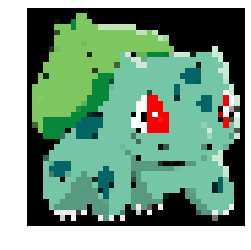

Psyduck


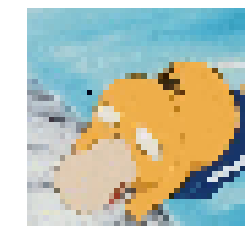

Bulbasaur


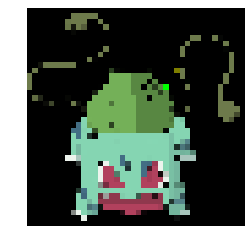

Charizard


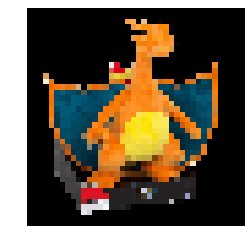

Psyduck


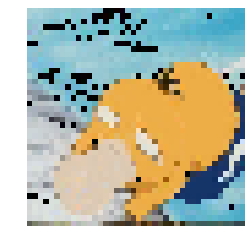

In [135]:
for i in range(5):
    plt.axis('off')
    ran = np.random.randint(0,570)
    pokemon = label2pokemon[labels[ran]]
    print(pokemon)
    plt.imshow(pokemons[ran])
    plt.show()

In [136]:
def softmax(a):
    e_pa = np.exp(a)
    return e_pa/(np.sum(e_pa,axis = 1,keepdims = True))

In [137]:
class NeuralNetworkMock:
    
    def __init__(self,input_size,hidden,output_size):
        
        model = {}
        
        model['w1'] = np.random.randn(input_size,hidden[0]) 
        model['b1'] = np.zeros((1,hidden[0]))
        
        model['w2'] = np.random.randn(hidden[0],hidden[1])
        model['b2'] = np.zeros((1,hidden[1]))
        
        model['w3'] = np.random.randn(hidden[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate = 0.01):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        m = x.shape[0]
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = np.dot(delta3,w3.T)*(1-np.square(a2))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = np.dot(delta2,w2.T)*(1-np.square(a1))
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['w1'] = self.model['w1'] - learning_rate*dw1
        self.model['b1'] = self.model['b1'] - learning_rate*db1
        
        self.model['w2'] = self.model['w2'] - learning_rate*dw2
        self.model['b2'] = self.model['b2'] - learning_rate*db2
        
        self.model['w3'] = self.model['w3'] - learning_rate*dw3
        self.model['b3'] = self.model['b3'] - learning_rate*db3
        
    def predict(self,x):
        y_ = self.forward(x)
        return np.argmax(y_,axis=1)

In [138]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [139]:
model = NeuralNetworkMock(input_size = 4800,hidden = [4,3],output_size = 4)

In [140]:
def train(X,Y_oht,epoch,model,learning_rate):
    
    training_loss = []
    for i in range(epoch):
        y_ = model.forward(X)
        l = loss(Y_oht,y_)
        training_loss.append(l)
        model.backward(X,Y_oht,learning_rate)
        
    return training_loss 

In [141]:
split = int((0.8)*pokemons.shape[0])

In [142]:
X = pokemons[:split,:]

In [143]:
Y = labels[:split]

In [144]:
print(X.shape)
print(Y.shape)

(456, 40, 40, 3)
(456,)


In [145]:
X_test = pokemons[split:,:]
Y_test = labels[split:]

In [146]:
print(X_test.shape)
print(Y_test.shape)

(114, 40, 40, 3)
(114,)


In [147]:
Y_oht1 = to_categorical(Y)

In [148]:
X = X.reshape(X.shape[0],-1)

In [149]:
losses = train(X,Y_oht1,500,model,0.001)

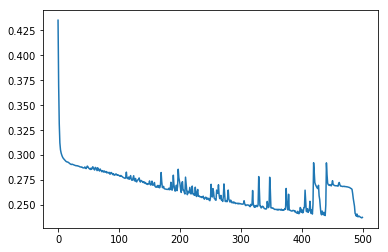

In [150]:
plt.plot(losses)
plt.show()

In [151]:
X_test = X_test.reshape(X_test.shape[0],-1)

In [152]:
output = model.predict(X_test)

In [159]:
np.sum((output == Y_test))/Y_test.shape[0]

0.5701754385964912